In [168]:
import numpy as np
import matplotlib.pyplot as plt

In [193]:
cls_carlos_ND = np.load("../chains/carlos_chains/cl_cross_corr_v3_DES_K1000_all_mag_correctMag/cl_cross_corr_bestfit_info.npz")
cls_carlos_SD = np.load("../chains/carlos_chains/cl_cross_corr_v3_DES_K1000_all_mag_correctMag/cl_cross_corr_bestfit_info_copy.npz")
cls_carlos_FD = np.append(cls_carlos_SD['cls'], cls_carlos_ND['cls'])

In [194]:
meta = np.load("../data/FD/FD_meta.npz")
files = np.load("../data/FD/FD_files.npz")
cls_jaime = np.load("jaime_cls.npz")

# Lengths

In [195]:
len(cls_carlos_FD) 

1275

In [196]:
len(np.transpose(cls_jaime['cls_m']))

1275

# Plots

In [197]:
data = meta["cls"]
err = np.sqrt(np.diag(meta["cov"]))
pairs = meta["pairs"]
idx = meta["idx"]
cls_m = cls_jaime['cls_m'][0]
cls_s = cls_jaime['cls_s'][0]
cls_carlos = cls_carlos_FD

## DESgc-DESgc

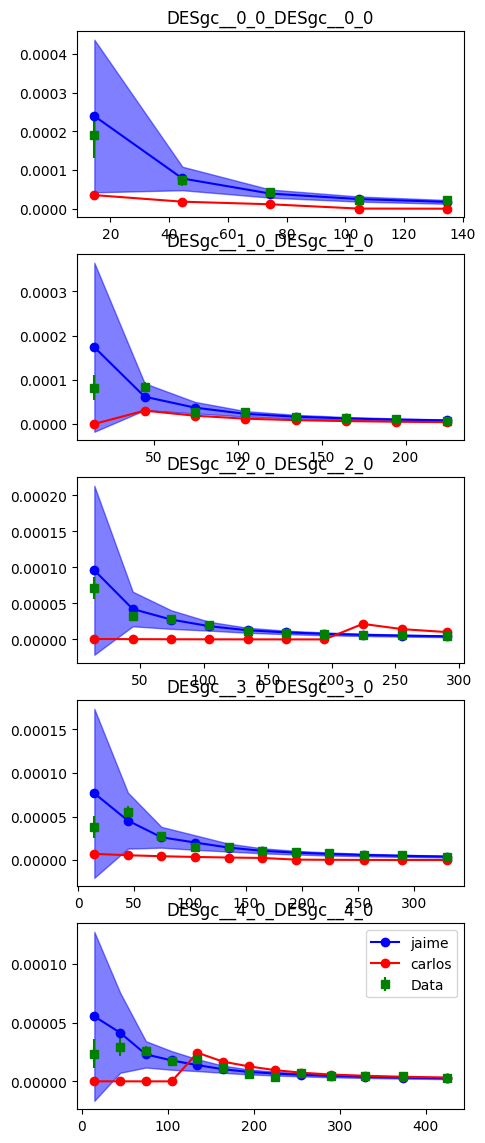

5


In [198]:
figure, axis = plt.subplots(5, figsize=(5,14))
l = 0
for i in range(0,5):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## DESgc-DESwl

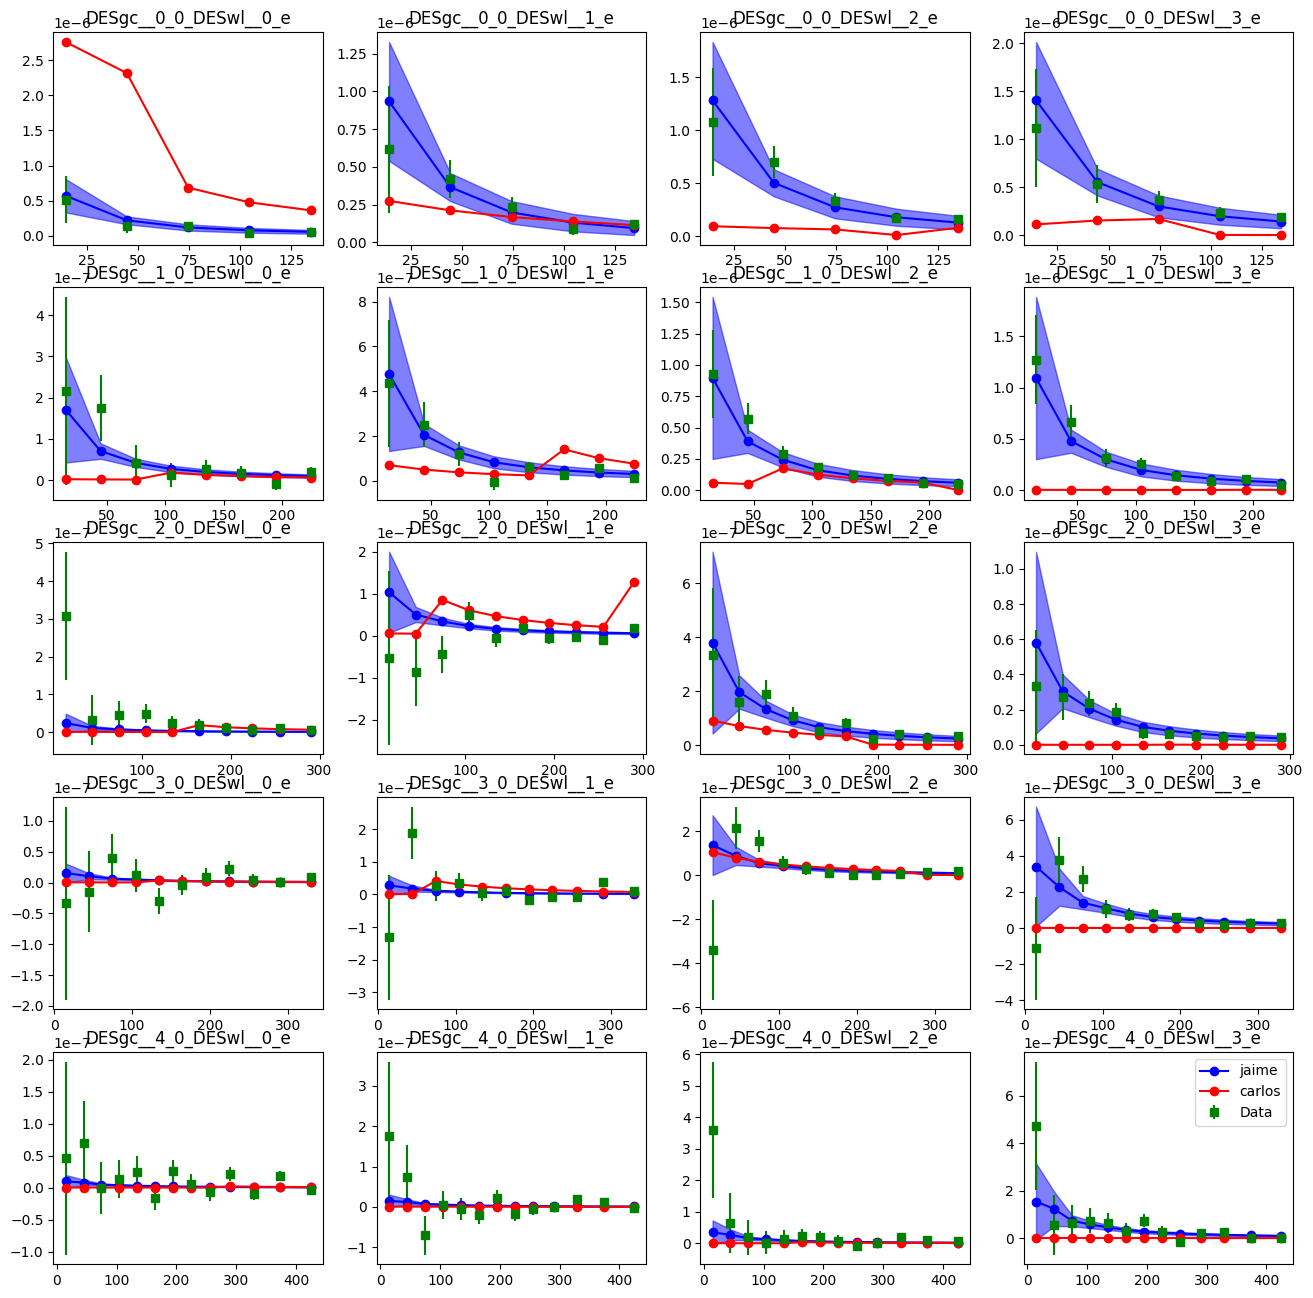

25


In [199]:
figure, axis = plt.subplots(5, 4, figsize=(16,16))
l = 5
for i in range(0,5):
    for j in range(0,4):
        t1, t2 = pairs[l][0], pairs[l][1]
        axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_carlos[idx[l]:idx[l+1]],
                        "ro-", label="carlos")
        axis[i, j].set_title("{}_{}".format(t1,t2))
        l += 1
plt.legend()
plt.show()
print(l)

## DESgc-CMBk

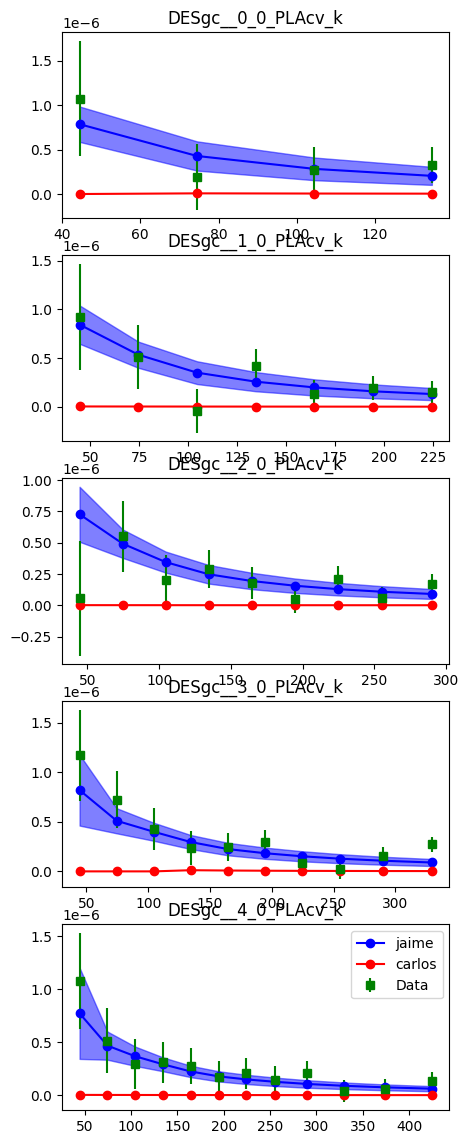

30


In [200]:
figure, axis = plt.subplots(5, figsize=(5,14))
l = 25
for i in range(0,5):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## DESwl-DESwl

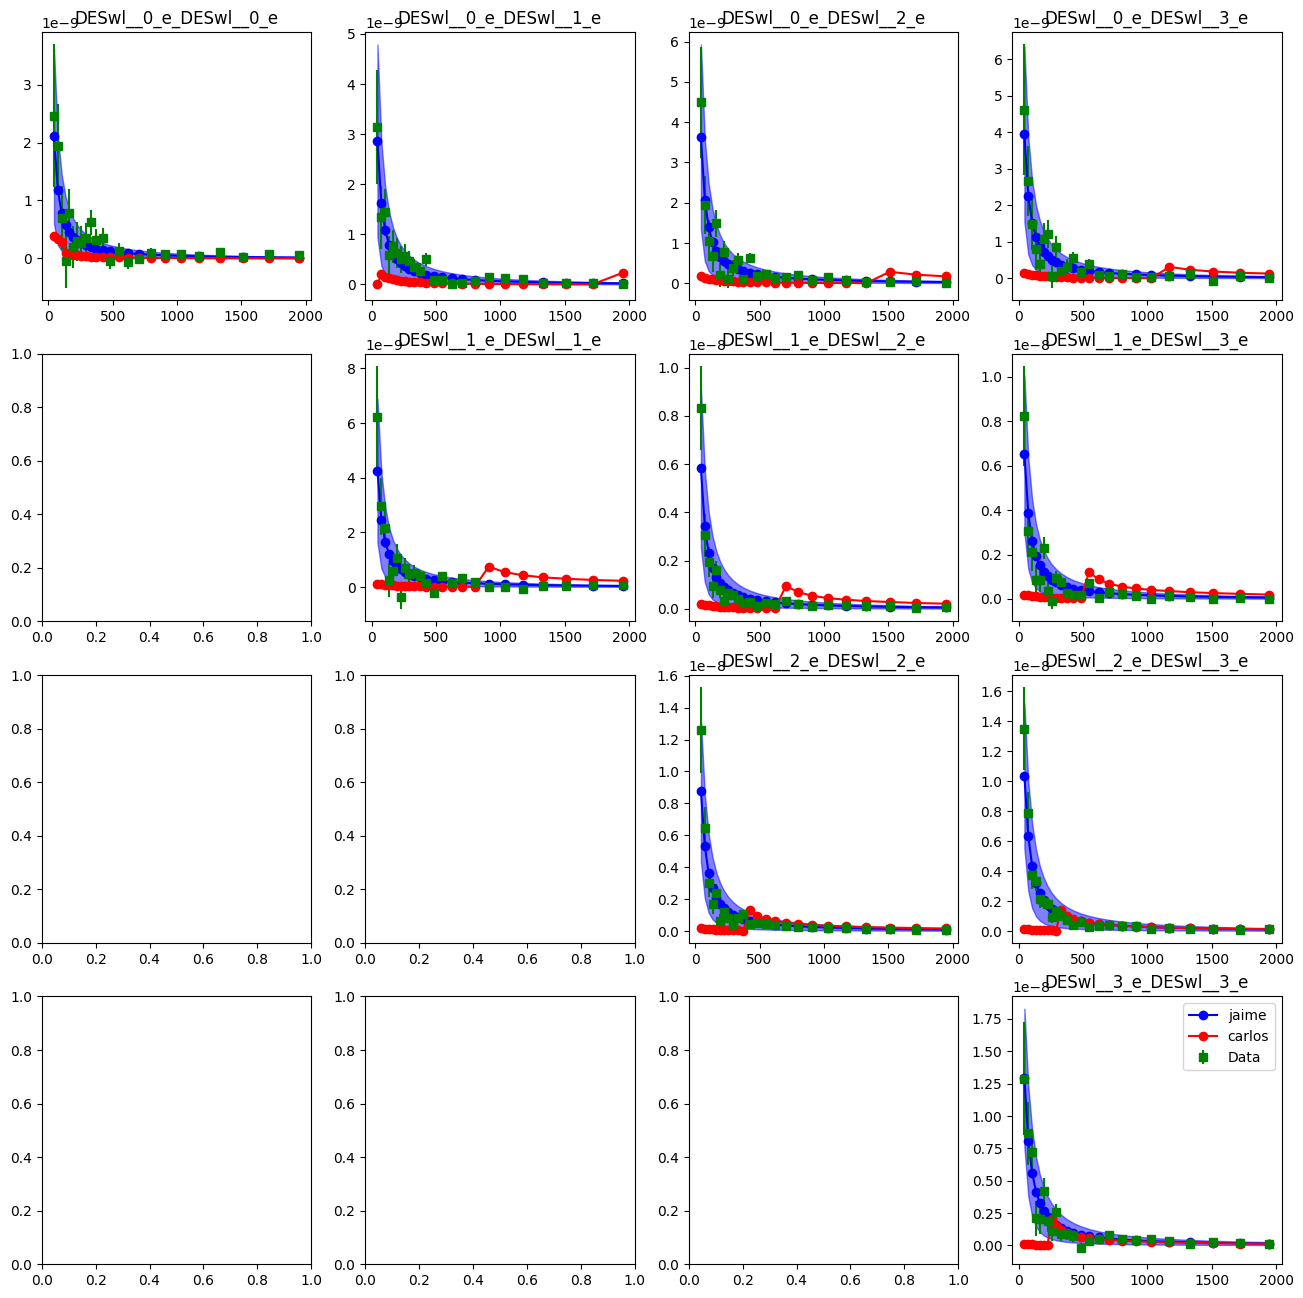

40


In [201]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 30
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            t1, t2 = pairs[l][0], pairs[l][1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_carlos[idx[l]:idx[l+1]],
                            "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            l += 1
plt.legend()
plt.show()
print(l)

## DESwl-CMBk

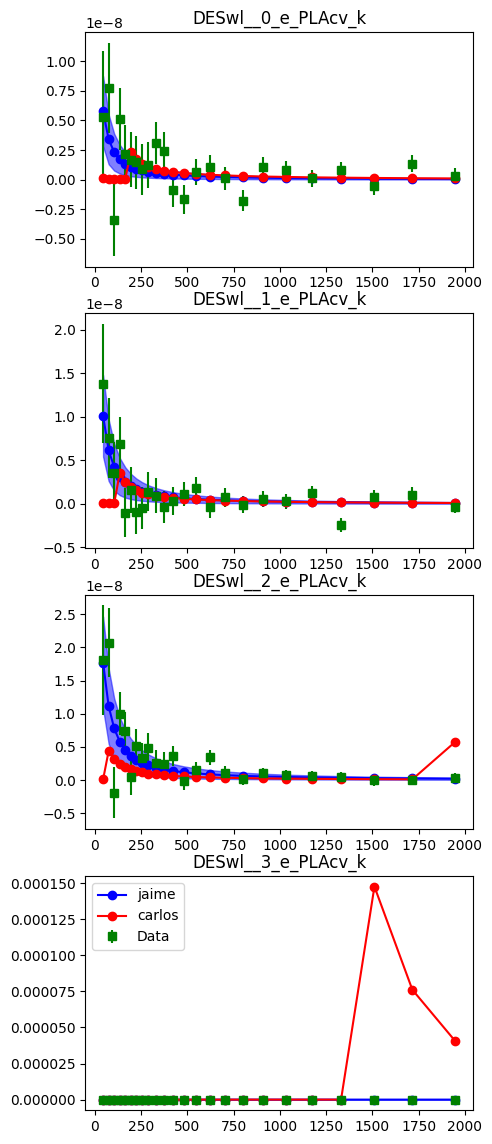

44


In [203]:
figure, axis = plt.subplots(4, figsize=(5,14))
l = 40
for i in range(0,4):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## eBOSS-eBOSS

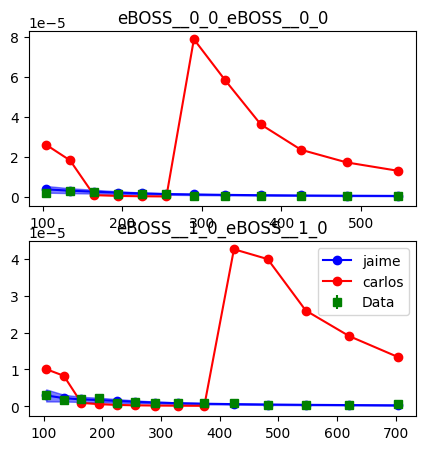

46


In [204]:
figure, axis = plt.subplots(2, figsize=(5,5))
l = 44
for i in range(0,2):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## eBOSS-CMBk

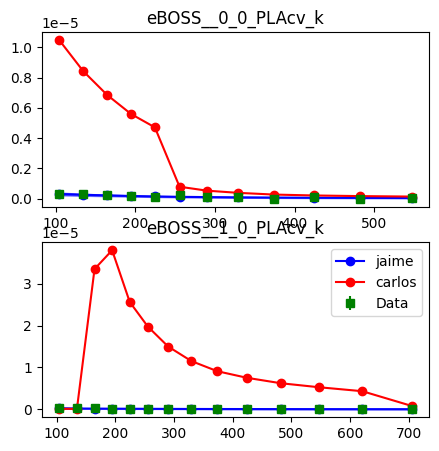

48


In [206]:
figure, axis = plt.subplots(2, figsize=(5,5))
l = 46
for i in range(0,2):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## DECALS-DECALS

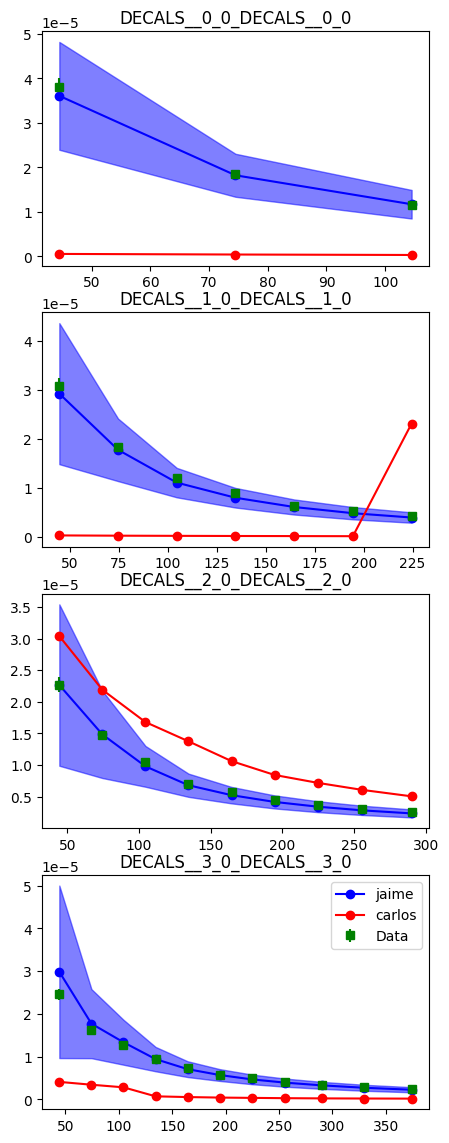

52


In [207]:
figure, axis = plt.subplots(4, figsize=(5,14))
l = 48
for i in range(0,4):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## DECALS-KiDS1000

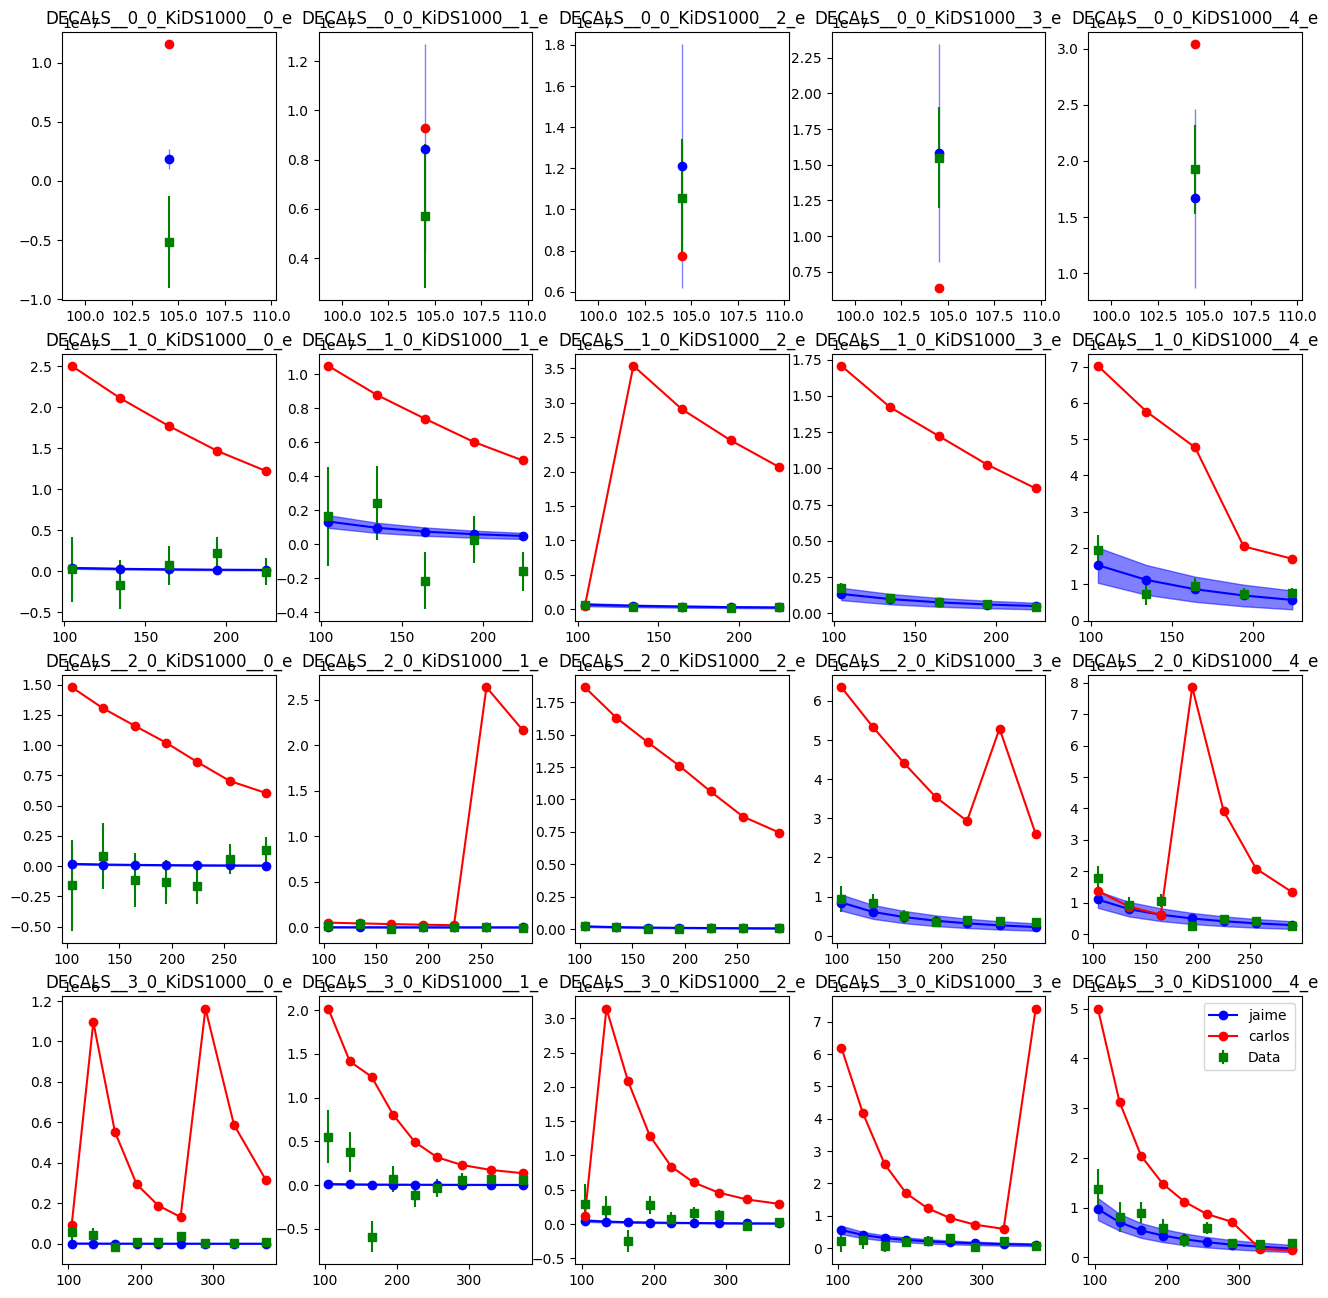

72


In [208]:
figure, axis = plt.subplots(4, 5, figsize=(16,16))
l = 52
for i in range(0,4):
    for j in range(0,5):
        t1, t2 = pairs[l][0], pairs[l][1]
        axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
        axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
        axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                        cls_carlos[idx[l]:idx[l+1]],
                        "ro-", label="carlos")
        axis[i, j].set_title("{}_{}".format(t1,t2))
        l += 1
plt.legend()
plt.show()
print(l)

## DECALS-CMBk

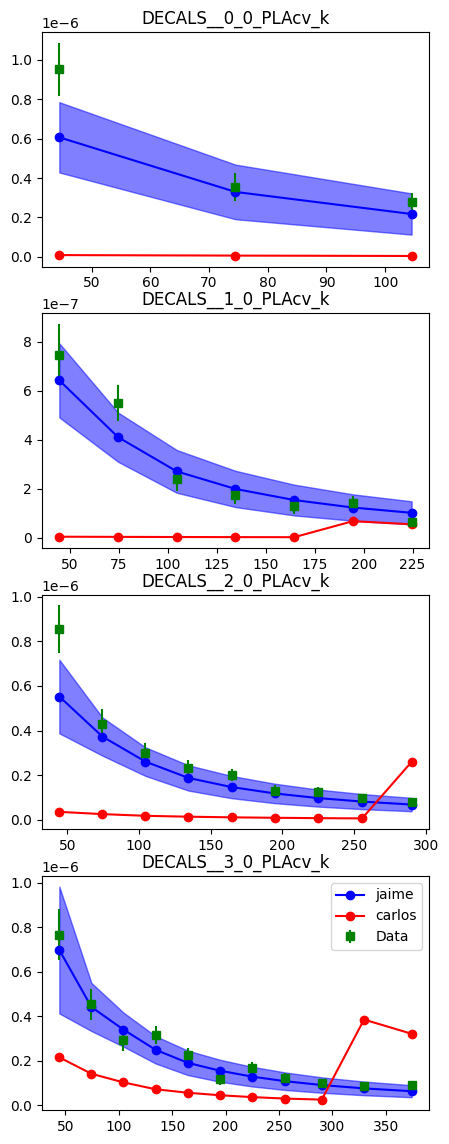

76


In [209]:
figure, axis = plt.subplots(4, figsize=(5,14))
l = 72
for i in range(0,4):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)

## KiDS1000-KiDS1000

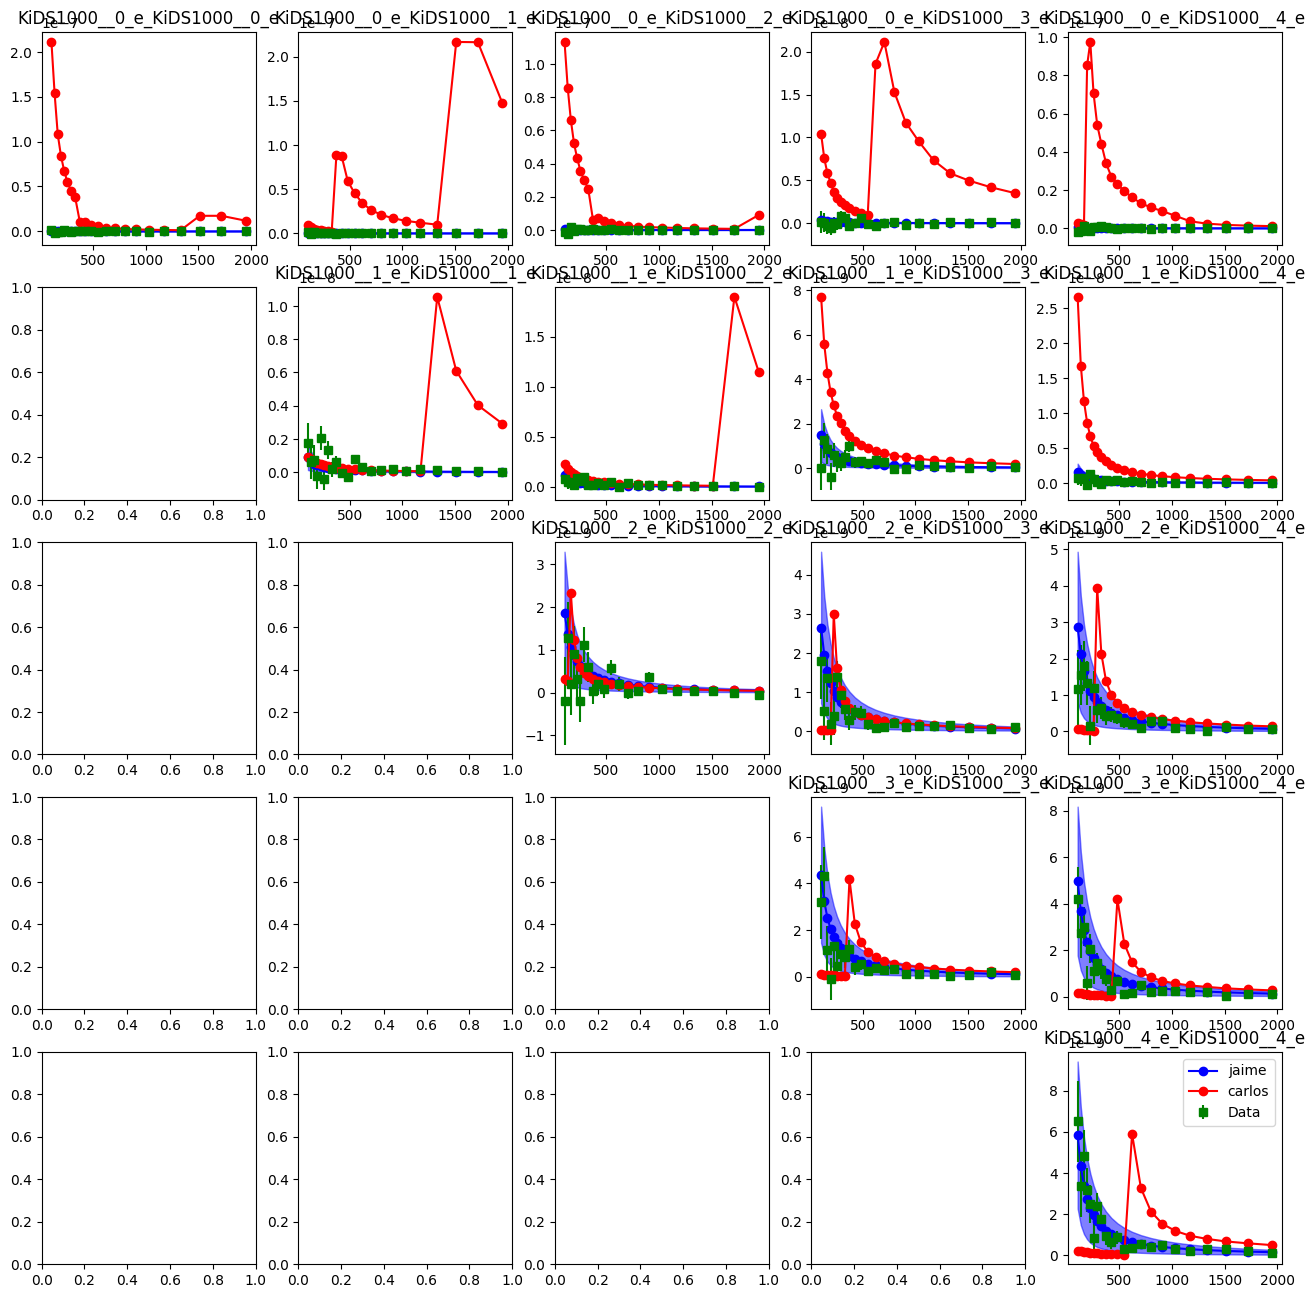

91


In [210]:
figure, axis = plt.subplots(5, 5, figsize=(16,16))
l = 76
for i in range(0,5):
    for j in range(0,5):
        if j >= i:
            t1, t2 = pairs[l][0], pairs[l][1]
            axis[i, j].errorbar(files["ls_{}_{}".format(t1, t2)], 
                         data[idx[l]:idx[l+1]], 
                         yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
            axis[i, j].fill_between(files["ls_{}_{}".format(t1, t2)],
                            (cls_m+cls_s)[idx[l]:idx[l+1]],
                            (cls_m-cls_s)[idx[l]:idx[l+1]],
                            color="b", alpha=.5)
            axis[i, j].plot(files["ls_{}_{}".format(t1, t2)],
                            cls_carlos[idx[l]:idx[l+1]],
                            "ro-", label="carlos")
            axis[i, j].set_title("{}_{}".format(t1,t2))
            l += 1
plt.legend()
plt.show()
print(l)

## KiDS1000-CMBk

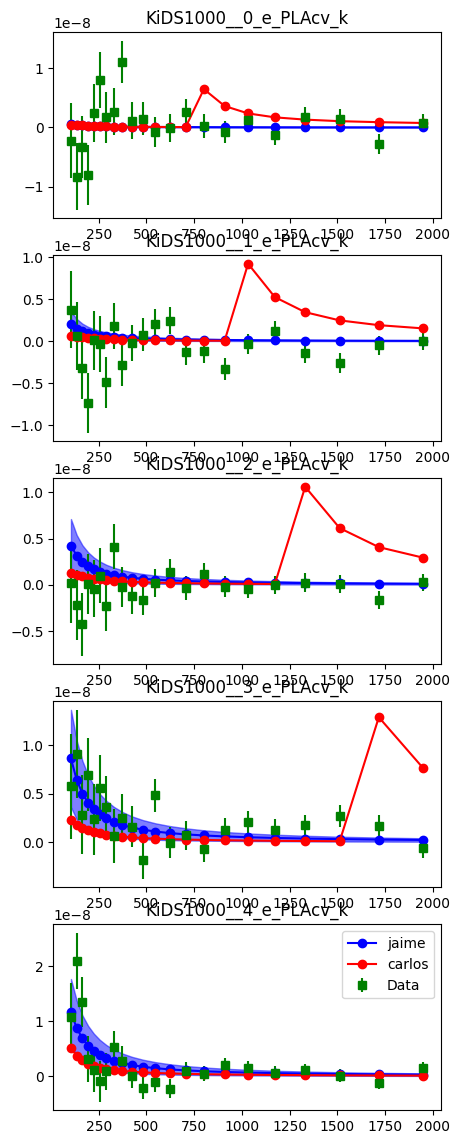

96


In [211]:
figure, axis = plt.subplots(5, figsize=(5,14))
l = 91
for i in range(0,5):
    t1, t2 = pairs[l][0], pairs[l][1]
    axis[i].errorbar(files["ls_{}_{}".format(t1, t2)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_m[idx[l]:idx[l+1]], 'bo-', label="jaime")
    axis[i].fill_between(files["ls_{}_{}".format(t1, t2)],
                        (cls_m+cls_s)[idx[l]:idx[l+1]],
                        (cls_m-cls_s)[idx[l]:idx[l+1]],
                        color="b", alpha=.5)
    axis[i].plot(files["ls_{}_{}".format(t1, t2)],
                 cls_carlos[idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("{}_{}".format(t1,t2))
    l += 1
plt.legend()
plt.show()
print(l)